# step 0 패키지 불러오기

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



# step 1 데이터 구성하기

In [4]:
df = pd.read_csv("DIABETES.csv", engine='python')
df_y = df['Y']
df_x = df.drop('Y', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)


train data X size :  (309, 10)
train data Y size :  (309,)
test data X size :  (133, 10)
test data Y size :  (133, 10)


# step 2 모델 생성

# 모델 parameter 조정

In [25]:
train_score = []
test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(15,30)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score



In [26]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,15,0.571,0.254
1,16,0.563,0.284
2,17,0.555,0.334
3,18,0.552,0.336
4,19,0.535,0.335
5,20,0.535,0.336
6,21,0.523,0.358
7,22,0.520,0.337
8,23,0.516,0.351
9,24,0.512,0.359


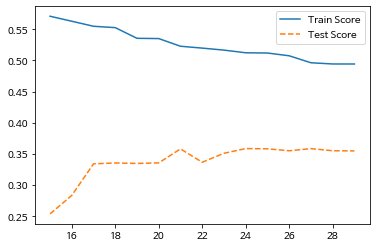

In [27]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()


In [12]:
train_score = []
test_score = []
para_split = [n_split * 2 for n_split in range(15,30)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=21, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,30,0.523,0.358
1,32,0.523,0.358
2,34,0.523,0.358
3,36,0.523,0.358
4,38,0.523,0.358
5,40,0.523,0.358
6,42,0.523,0.358
7,44,0.523,0.358
8,46,0.519,0.359
9,48,0.513,0.369


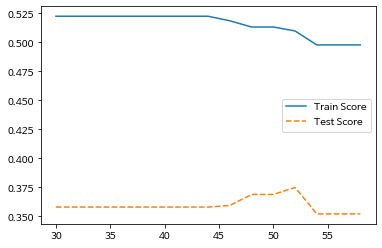

In [13]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()


In [18]:
train_score = []
test_score = []
para_depth = [depth for depth in range(1,15)]
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=21, min_samples_split=52, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.292,0.231
1,2,0.438,0.351
2,3,0.496,0.398
3,4,0.510,0.375
4,5,0.510,0.375
5,6,0.510,0.375
6,7,0.510,0.375
7,8,0.510,0.375
8,9,0.510,0.375
9,10,0.510,0.375


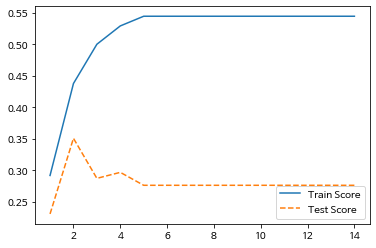

In [15]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label= "Test Score")
plt.legend()

In [19]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(random_state=1234, min_samples_leaf=21, min_samples_split=52, max_depth=5)
tree_final.fit(df_train_x, df_train_y)
export_graphviz(tree_final, out_file="tree_final.dot", feature_names = v_feature_name, impurity=True, filled=True)

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.596
8,LTG,0.182
9,GLUCOSE,0.131
3,BP,0.050
6,HDL,0.040
0,AGE,0.000
1,GENDER,0.000
4,CHOLESTEROL,0.000
5,LDL,0.000
7,TCH,0.000


Text(0, 0.5, '변수')

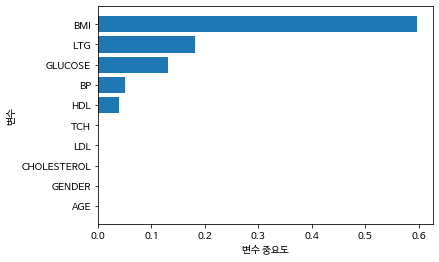

In [20]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [15]:
estimator = DecisionTreeRegressor()
param_grid = {"criterion":["mse","friedman_mse", "mae"], "max_features":["auto","sqrt", "log2"],
             "max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator,param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)
AC
print("best model : ", grid_dt.best_estimator_)
print("best parameter: ", grid_dt.best_params_)
print("best score : ", grid_dt.best_score_.round(3))




/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best model :  DecisionTreeRegressor(criterion='mae', max_depth=12, max_features='log2',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=38, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
best parameter:  {'criterion': 'mae', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 38}
best score :  0.407
